In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **loading data**

In [ ]:
train_data = '/content/drive/MyDrive/UmojaHack Africa 2022: Faulty Air Quality Sensor Challenge/train.csv'
test_data = '/content/drive/MyDrive/UmojaHack Africa 2022: Faulty Air Quality Sensor Challenge/test.csv'

In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/UmojaHack Africa 2022: Faulty Air Quality Sensor Challenge/train.csv',  parse_dates = ['Datetime'], low_memory=False,)
Test_data = pd.read_csv('/content/drive/MyDrive/UmojaHack Africa 2022: Faulty Air Quality Sensor Challenge/test.csv', parse_dates = ['Datetime'], low_memory=False,)


# preform data exploration 

In [ ]:
#first 5 index
Train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


In [ ]:
# Take a look at our training data
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


In [ ]:
Train_data.shape

(297177, 7)

In [ ]:
Train_data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.00000,293563.00000,293628.00000,293628.00000,297177.00000
mean,40.75120,38.18302,23.31655,78.65362,0.37107
std,28.52618,28.64776,3.83697,14.77272,0.48309
min,-9.45000,-9.70000,16.70000,27.00000,0.00000
25%,22.43000,19.52000,20.40000,68.00000,0.00000
50%,36.47000,33.72000,21.90000,84.00000,0.00000
75%,49.42000,47.57000,26.30000,91.00000,1.00000
max,997.96000,997.26000,34.90000,99.00000,1.00000


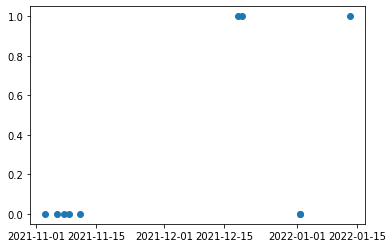

In [ ]:
# plot to see the connection between datatime and Offset_fault
fig, ax = plt.subplots()
ax.scatter(Train_data["Datetime"][:10], Train_data["Offset_fault"][:10])

In [ ]:
#check if we have missing values
Train_data.isna().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [ ]:
# Fill numeric rows with the median
for label, content in Train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
       
            # Fill missing numeric values with median
            Train_data[label] = content.fillna(content.median())

In [ ]:
# Check for duplicates
Train_data.duplicated().any()

False

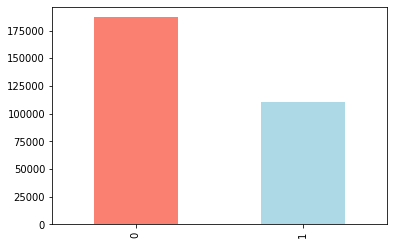

In [ ]:
Train_data.Offset_fault.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

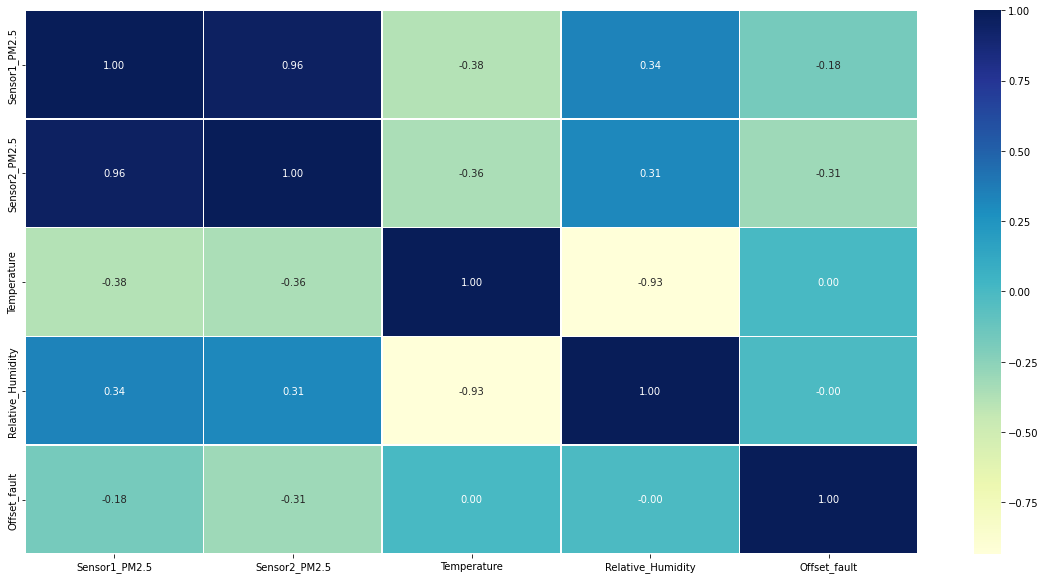

In [ ]:
corr_matrix = Train_data.corr()
plt.figure(figsize=(20.0,10.0))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [ ]:
# take a look at our the important 4 lables 
sub = Train_data[['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity']]
sub.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,52.58000,49.52000,17.40000,96.00000
1,35.25000,33.40000,25.00000,75.00000
2,19.18000,23.50000,24.90000,75.00000
3,19.40000,15.48000,24.90000,70.00000
4,38.30000,34.77000,20.90000,89.00000


# Checking for outlires 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b090e2910>,
      dtype=object)

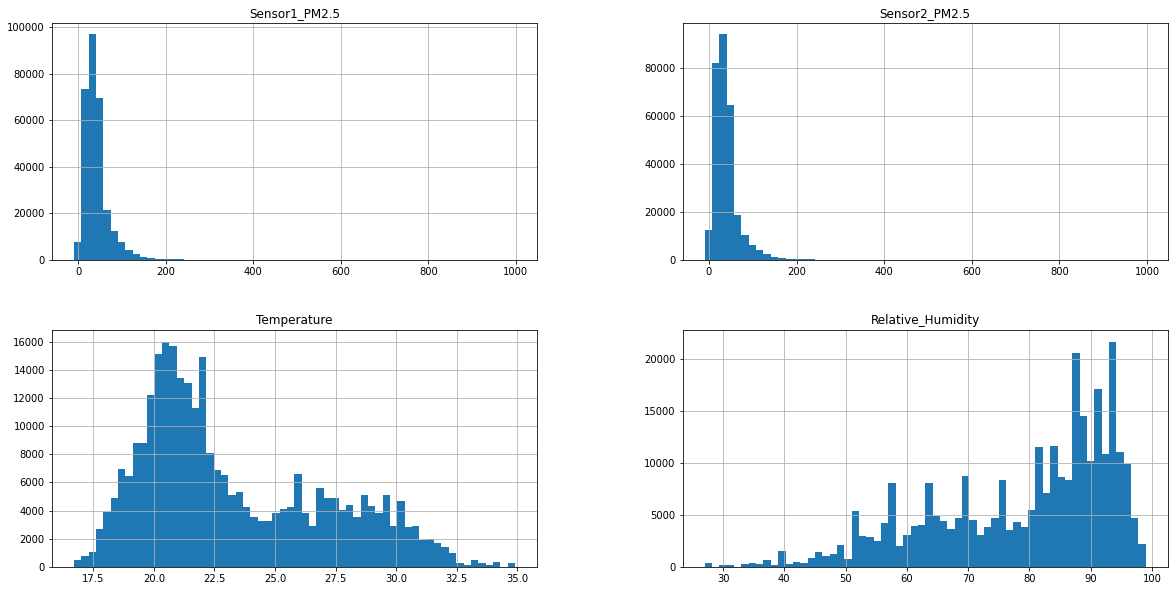

In [ ]:
# checking for outlires in Sensor1_PM2.5 ,Sensor2_PM2.5,	Temperature  and 	Relative_Humidity
sub.hist(bins=60 , figsize=(20 , 10))

In [ ]:
Train_data['Sensor1_PM2.5']

0        52.58000
1        35.25000
2        19.18000
3        19.40000
4        38.30000
           ...   
297172   36.40000
297173   50.12000
297174   53.68000
297175   96.45000
297176   44.27000
Name: Sensor1_PM2.5, Length: 297177, dtype: float64

In [ ]:
#df['Sensor1_PM2.5'].quantile(0.95)


In [ ]:
Train_data[Train_data['Sensor1_PM2.5']>200]

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
7509,ID_1NGDVR7ADR4M,2021-10-26 19:43:48,242.27000,233.33000,23.20000,74.00000,0
11944,ID_MAYKI31TP9UK,2021-11-14 01:05:02,212.22000,202.33000,20.20000,81.00000,0
13086,ID_QHQKHDP7V0XY,2021-10-24 15:10:09,873.65000,872.95000,32.20000,49.00000,0
13517,ID_WH773SRN4BTT,2021-10-24 12:33:39,551.38000,550.68000,31.70000,49.00000,0
14219,ID_W67EBFTI9OQN,2021-10-24 06:47:54,207.70000,197.12000,19.70000,92.00000,0
...,...,...,...,...,...,...,...
291185,ID_7P2J5CZWLF5M,2021-10-24 16:50:59,649.62000,648.92000,31.20000,55.00000,0
291220,ID_21Z904WS1AOV,2021-10-30 00:59:12,203.68000,176.95000,20.60000,93.00000,0
291954,ID_RMTTIV0UDF5G,2021-10-24 10:15:45,853.81000,853.11000,29.50000,57.00000,0
295533,ID_LN612Q4IDS1P,2021-10-30 00:46:45,239.82000,208.95000,20.60000,93.00000,0


In [ ]:
Train_data['Sensor1_PM2.5']

0        52.58000
1        35.25000
2        19.18000
3        19.40000
4        38.30000
           ...   
297172   36.40000
297173   50.12000
297174   53.68000
297175   96.45000
297176   44.27000
Name: Sensor1_PM2.5, Length: 297177, dtype: float64

In [ ]:
Train_data[Train_data['Sensor2_PM2.5']>200]

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
4342,ID_02Y2YKIMHFSH,2021-12-16 07:34:23,178.25000,209.93000,18.60000,92.00000,0
7509,ID_1NGDVR7ADR4M,2021-10-26 19:43:48,242.27000,233.33000,23.20000,74.00000,0
11944,ID_MAYKI31TP9UK,2021-11-14 01:05:02,212.22000,202.33000,20.20000,81.00000,0
13084,ID_THM1HU7MRWBM,2022-01-05 00:04:31,154.63000,207.33000,19.30000,81.00000,0
13086,ID_QHQKHDP7V0XY,2021-10-24 15:10:09,873.65000,872.95000,32.20000,49.00000,0
...,...,...,...,...,...,...,...
291185,ID_7P2J5CZWLF5M,2021-10-24 16:50:59,649.62000,648.92000,31.20000,55.00000,0
291954,ID_RMTTIV0UDF5G,2021-10-24 10:15:45,853.81000,853.11000,29.50000,57.00000,0
294137,ID_J42EHFGM6QT3,2022-01-05 08:19:49,165.95000,203.52000,17.00000,91.00000,0
295533,ID_LN612Q4IDS1P,2021-10-30 00:46:45,239.82000,208.95000,20.60000,93.00000,0


In [ ]:
com = Train_data[['Sensor1_PM2.5','Offset_fault' , 'Sensor2_PM2.5']]
com.head()

,Sensor1_PM2.5,Offset_fault,Sensor2_PM2.5
0,52.58000,0,49.52000
1,35.25000,0,33.40000
2,19.18000,0,23.50000
3,19.40000,0,15.48000
4,38.30000,0,34.77000


In [ ]:
com1=com[com['Sensor1_PM2.5']>200]


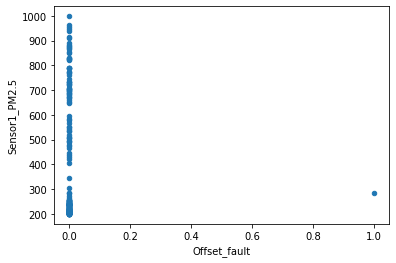

In [ ]:
com1[['Sensor1_PM2.5' , 'Offset_fault']].plot(kind ='scatter' , x ='Offset_fault' , y = 'Sensor1_PM2.5' )

In [ ]:
com2=com[(com['Sensor1_PM2.5']>200) | (com['Sensor2_PM2.5']>200)]
com2

,Sensor1_PM2.5,Offset_fault,Sensor2_PM2.5
4342,178.25000,0,209.93000
7509,242.27000,0,233.33000
11944,212.22000,0,202.33000
13084,154.63000,0,207.33000
13086,873.65000,0,872.95000
...,...,...,...
291954,853.81000,0,853.11000
294137,165.95000,0,203.52000
295533,239.82000,0,208.95000
296351,201.48000,0,169.13000


In [ ]:
min_thr , max_thr = Train_data['Relative_Humidity'].quantile([.50 , 0.95])
min_thr , max_thr

(84.0, 96.0)

In [ ]:
Train_data.describe()

In [ ]:
print(Train_data['Sensor2_PM2.5'].quantile(0.50)) 
print(Train_data['Sensor2_PM2.5'].quantile(0.95)) 
Train_data['Sensor2_PM2.5'] = np.where(Train_data['Sensor2_PM2.5'] > 33.72, 90.82, Train_data['Sensor2_PM2.5'])
Train_data.describe()

In [ ]:
print(Train_data['Temperature'].quantile(0.50)) 
print(Train_data['Temperature'].quantile(0.95)) 
Train_data['Temperature'] = np.where(Train_data['Temperature'] > 21.9, 30.5, Train_data['Temperature'])
Train_data.describe()

In [ ]:
print(Train_data['Relative_Humidity'].quantile(0.50)) 
print(Train_data['Relative_Humidity'].quantile(0.95)) 
Train_data['Relative_Humidity'] = np.where(Train_data['Relative_Humidity'] > 84.0,96.0 , Train_data['Relative_Humidity'])
Train_data.describe()

84.0
96.0


,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177.00000,297177.00000,297177.00000,297177.00000,297177.00000
mean,57.85204,54.90602,25.30761,81.07848,0.37107
std,36.44705,36.01963,5.18046,16.56556,0.48309
min,-9.45000,-9.70000,16.70000,27.00000,0.00000
25%,22.65000,19.70000,20.40000,68.00000,0.00000
50%,36.47000,33.72000,21.90000,84.00000,0.00000
75%,94.15000,90.82000,30.50000,96.00000,1.00000
max,94.15000,90.82000,30.50000,96.00000,1.00000


In [ ]:
#new =Train_data[(Train_data['Sensor1_PM2.5']<max_thr.fillna().mean()) & (Train_data['Sensor1_PM2.5']>min_thr.fillna().mean())]
#new.shape

AttributeError: ignored

In [ ]:
#min_thr1 , max_thr2 = Train_data['Sensor2_PM2.5'].quantile([0.001 , 0.999])
#min_thr1 , max_thr2

(1.68, 193.43)

In [ ]:
#new =Train_data[(Train_data['Sensor2_PM2.5']<max_thr2.fillna(38.12874)) & (Train_data['Sensor2_PM2.5']>min_thr1.fillna.(38.12874))]
#new.shape

(296579, 10)

In [ ]:
#min_thr3 , max_thr3 = Train_data['Temperature'].quantile([0.001 , 0.999])
#min_thr3 , max_thr3

(17.0, 34.0)

In [ ]:
#new =Train_data[(Train_data['Sensor2_PM2.5']<max_thr3.fillna.(23.29964)) & (Train_data['Sensor2_PM2.5']>min_thr3.fillna.(23.29964))]
#new.shape

(91574, 10)

In [ ]:
#min_thr4 , max_thr4 = Train_data['Relative_Humidity'].quantile([0.001 , 0.999])
#min_thr4 , max_thr4

(27.0, 99.0)

In [ ]:
#new =Train_data[(Train_data['Relative_Humidity']<max_thr4.fillna.(78.71747)) & (Train_data['Relative_Humidity']>min_thr4.fillna.(78.71747))]
#new.shape

(296143, 10)

In [ ]:
#new3.sample(10)

,ID,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Year,Month,Day,Hours
113989,ID_7G8F7CXV25Y4,45.75000,50.13000,19.50000,67.00000,0,2022,1,21,4
78912,ID_9XU8JL1INQF1,52.13000,49.53000,21.70000,88.00000,0,2021,12,1,23
150605,ID_GP5ATZWAPC08,7.47000,8.57000,27.90000,68.00000,0,2021,12,29,13
276013,ID_2FOV73OAHKT3,25.27000,31.28000,20.30000,84.00000,0,2022,1,17,2
59079,ID_R8G552E2TOR2,21.20000,15.28000,21.60000,90.00000,1,2022,1,11,23
195554,ID_EN54DO0XZWW1,7.25000,11.80000,29.70000,58.00000,0,2021,12,6,15
152571,ID_L172HJR5L124,36.22000,32.52000,21.10000,92.00000,1,2022,1,12,2
62977,ID_EQ4NB2V0ZHM5,46.85000,48.00000,24.50000,70.00000,0,2021,10,27,19
125722,ID_6AAPP2GVW8R7,40.72000,37.53000,19.60000,96.00000,0,2021,11,6,7
168953,ID_32O08XEX65XC,42.87000,47.38000,20.00000,92.00000,0,2021,11,26,23


# Data cleaning 

In [ ]:
Train_data.sort_values(by=["Datetime"], inplace=True, ascending=True)
Train_data.Datetime.head(20)

116880   2021-10-15 16:00:31
220210   2021-10-15 16:00:34
260869   2021-10-15 16:01:01
200775   2021-10-15 16:01:54
164575   2021-10-15 16:02:06
7572     2021-10-15 16:02:13
255867   2021-10-15 16:03:18
242989   2021-10-15 16:03:26
252121   2021-10-15 16:03:37
239020   2021-10-15 16:04:42
62539    2021-10-15 16:05:08
266633   2021-10-15 16:06:04
49743    2021-10-15 16:06:40
220721   2021-10-15 16:07:27
134964   2021-10-15 16:07:47
241097   2021-10-15 16:08:12
62591    2021-10-15 16:08:50
139620   2021-10-15 16:09:00
193611   2021-10-15 16:09:46
97879    2021-10-15 16:10:13
Name: Datetime, dtype: datetime64[ns]

In [ ]:
#create new columns for  year , month , day and hours
Train_data["Year"] = Train_data.Datetime.dt.year
Train_data["Month"] = Train_data.Datetime.dt.month
Train_data["Day"] = Train_data.Datetime.dt.day
Train_data["Hours"] = Train_data.Datetime.dt.hour


In [ ]:
Train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Year,Month,Day,Hours
116880,ID_37STUCVVPZKP,2021-10-15 16:00:31,9.17000,9.28000,30.50000,53.00000,0,2021,10,15,16
220210,ID_YZZUOMF0TQIF,2021-10-15 16:00:34,9.93000,11.25000,30.50000,53.00000,0,2021,10,15,16
260869,ID_UF68QLIPG3LE,2021-10-15 16:01:01,6.53000,3.15000,30.50000,53.00000,1,2021,10,15,16
200775,ID_KKCO4VATOSWB,2021-10-15 16:01:54,8.30000,8.35000,30.50000,53.00000,0,2021,10,15,16
164575,ID_8YNKABZP11SS,2021-10-15 16:02:06,6.87000,9.57000,30.50000,53.00000,0,2021,10,15,16


In [ ]:
# Now we've enriched our DataFrame with date time features, we can remove 'Datetime'
Train_data.drop("Datetime", axis=1, inplace=True)


In [ ]:
Train_data.head()

,ID,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Year,Month,Day,Hours
116880,ID_37STUCVVPZKP,9.17000,9.28000,30.50000,53.00000,0,2021,10,15,16
220210,ID_YZZUOMF0TQIF,9.93000,11.25000,30.50000,53.00000,0,2021,10,15,16
260869,ID_UF68QLIPG3LE,6.53000,3.15000,30.50000,53.00000,1,2021,10,15,16
200775,ID_KKCO4VATOSWB,8.30000,8.35000,30.50000,53.00000,0,2021,10,15,16
164575,ID_8YNKABZP11SS,6.87000,9.57000,30.50000,53.00000,0,2021,10,15,16


In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 127361 non-null  object        
 1   Datetime           127361 non-null  datetime64[ns]
 2   Sensor1_PM2.5      127361 non-null  float64       
 3   Sensor2_PM2.5      127361 non-null  float64       
 4   Temperature        39271 non-null   float64       
 5   Relative_Humidity  39271 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.8+ MB


In [ ]:
Test_data.isna().sum()

ID                       0
Datetime                 0
Sensor1_PM2.5            0
Sensor2_PM2.5            0
Temperature          88090
Relative_Humidity    88090
dtype: int64

In [ ]:
# Fill numeric rows with the median
for label, content in Test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
       
            # Fill missing numeric values with median
            Test_data[label] = content.fillna(content.median())

In [ ]:
Test_data.isna().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
dtype: int64

In [ ]:
# we do the same here for our test data 
Test_data["Year"] = Test_data.Datetime.dt.year
Test_data["Month"] = Test_data.Datetime.dt.month
Test_data["Day"] = Test_data.Datetime.dt.day
Test_data["Hours"] = Test_data.Datetime.dt.hour

In [ ]:
Test_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Year,Month,Day,Hours
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75000,114.78000,22.20000,56.00000,2022,1,28,8
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03000,52.18000,22.50000,78.00000,2022,2,16,21
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35000,346.73000,28.10000,63.00000,2022,1,24,17
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17000,83.85000,21.60000,82.00000,2022,1,31,7
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23000,53.07000,22.70000,80.00000,2022,1,31,0


In [ ]:
# Now we've enriched our DataFrame with date time features, we can remove 'Datetime'
Test_data.drop("Datetime", axis=1, inplace=True)


In [ ]:
Test_data.head()

,ID,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Year,Month,Day,Hours
0,ID_STL3V9B2OU12,90.75000,114.78000,22.20000,56.00000,2022,1,28,8
1,ID_U2EKAY4SGA94,56.03000,52.18000,22.50000,78.00000,2022,2,16,21
2,ID_UJFLEWQR0U4N,387.35000,346.73000,28.10000,63.00000,2022,1,24,17
3,ID_S2C2GPGA4R5I,63.17000,83.85000,21.60000,82.00000,2022,1,31,7
4,ID_5V2C2ZL221H8,69.23000,53.07000,22.70000,80.00000,2022,1,31,0


#Modelling


In [ ]:
#using Xgboost to train our model 
%%time


 
model = XGBClassifier()
model.fit(Train_data.drop(["ID" , "Offset_fault"], axis=1 ), Train_data["Offset_fault"])



CPU times: user 16.6 s, sys: 86.1 ms, total: 16.7 s
Wall time: 20.8 s


In [ ]:
model.score(Train_data.drop(["ID" , "Offset_fault"], axis=1 ), Train_data["Offset_fault"])

0.8373326334137567

In [ ]:
# set our x and y 
x = Train_data.drop(["ID" , "Offset_fault"], axis=1 )
y = Train_data["Offset_fault"]

In [ ]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=123)

In [ ]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error

In [ ]:
#show score on the training data
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),}
    return scores
  

In [ ]:
show_scores(model)

{'Training MAE': 0.16230897544983006}

In [ ]:
#make a list of parameters to tune using GridSearchCV

param_grid = { 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
               'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
               'min_child_weight' : [ 1, 3, 5, 7 ],
               'n_iter' : [5,10,20,30,50],
               'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
               'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
         } 
    

In [ ]:
clf = RandomizedSearchCV(model,param_distributions=param_grid,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 5,
 'missing': None,
 'n_estimators': 100,
 'n_iter': 20,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}


In [ ]:
# our final best parameters
clf.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_iter': 20}

In [ ]:
show_scores(clf)

{'Training MAE': 0.1636790162626248}

Make predection on the X_test

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

Accuracy score: 0.8344325549049959


# Make predection on the Test data

In [ ]:

Test = Test_data.drop(['ID'], axis=1)

In [ ]:
Test.head()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Year,Month,Day,Hours
0,90.75000,114.78000,22.20000,56.00000,2022,1,28,8
1,56.03000,52.18000,22.50000,78.00000,2022,2,16,21
2,387.35000,346.73000,28.10000,63.00000,2022,1,24,17
3,63.17000,83.85000,21.60000,82.00000,2022,1,31,7
4,69.23000,53.07000,22.70000,80.00000,2022,1,31,0


In [ ]:
Test_preds = clf.predict(Test)

In [ ]:
Train_data.head()

,ID,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Year,Month,Day,Hours
116880,ID_37STUCVVPZKP,9.17000,9.28000,30.50000,53.00000,0,2021,10,15,16
220210,ID_YZZUOMF0TQIF,9.93000,11.25000,30.50000,53.00000,0,2021,10,15,16
260869,ID_UF68QLIPG3LE,6.53000,3.15000,30.50000,53.00000,1,2021,10,15,16
200775,ID_KKCO4VATOSWB,8.30000,8.35000,30.50000,53.00000,0,2021,10,15,16
164575,ID_8YNKABZP11SS,6.87000,9.57000,30.50000,53.00000,0,2021,10,15,16


# Making our Submission File 

In [ ]:
S_file = pd.DataFrame()
S_file["ID"] = Test_data["ID"]
S_file["Offset_fault"] = Test_preds
S_file

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,1
...,...,...
127356,ID_HNCS9Q2GNCQB,0
127357,ID_GIIQYTE11L3H,1
127358,ID_EC7F1P4GXKCL,0
127359,ID_J64RVG2BRAG0,0


In [ ]:
#uploading our Submission File to my google drive account 
S_file.to_csv(r'/content/drive/MyDrive/test_predections_17.csv', index = False)